In [312]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection, multipletests
import statsmodels

### 1. Load and visualize the data

a) 

In [313]:
core_path = './data'
transcriptomics = pd.read_csv( os.path.join(core_path, 'transcriptomics.dataset.txt'),sep= "\t")

In [314]:
transcriptomics.rename(columns = {"Unnamed: 0":'Gene_ID'})

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the size of the matrix ?

63677 genes and 80 samples : matrix size 63677*80

b) What type of data do you have? Normalized or raw read counts (integer)?

number of transcripts, raw read counts

c)

In [315]:
print(list(transcriptomics.columns.values))

['Unnamed: 0', 'Sample_1_preadi', 'Sample_2_preadi', 'Sample_3_preadi', 'Sample_4_preadi', 'Sample_5_preadi', 'Sample_6_preadi', 'Sample_7_preadi', 'Sample_8_preadi', 'Sample_9_preadi', 'Sample_10_preadi', 'Sample_11_preadi', 'Sample_12_preadi', 'Sample_13_preadi', 'Sample_14_preadi', 'Sample_15_preadi', 'Sample_16_preadi', 'Sample_17_preadi', 'Sample_18_preadi', 'Sample_19_preadi', 'Sample_20_preadi', 'Sample_21_preadi', 'Sample_22_preadi', 'Sample_23_preadi', 'Sample_24_preadi', 'Sample_25_preadi', 'Sample_26_preadi', 'Sample_27_preadi', 'Sample_28_preadi', 'Sample_29_preadi', 'Sample_30_preadi', 'Sample_31_preadi', 'Sample_32_preadi', 'Sample_33_preadi', 'Sample_34_preadi', 'Sample_35_preadi', 'Sample_36_preadi', 'Sample_37_preadi', 'Sample_38_preadi', 'Sample_39_preadi', 'Sample_40_preadi', 'Sample_41_adipo', 'Sample_42_adipo', 'Sample_43_adipo', 'Sample_44_adipo', 'Sample_45_adipo', 'Sample_46_adipo', 'Sample_47_adipo', 'Sample_48_adipo', 'Sample_49_adipo', 'Sample_50_adipo', 'Sam

In [316]:
dict_sample = {}
for idx, sample in enumerate(transcriptomics.columns.values[1:]) :
    if ( sample == "Sample_{}_preadi".format(idx+1) ):
        #dict_sample["Sample_{}".format(idx+1)]="PreAdipo"
        dict_sample[sample]="PreAdipo"
    else :
        dict_sample[sample]="Adipo"
        

In [317]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d)

In [318]:
transcriptomics.iloc[:,1:]

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
1,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
3,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
4,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
(transcriptomics.iloc[:,1:] != 0).any(axis=1)

0         True
1         True
2         True
3         True
4         True
         ...  
63672     True
63673    False
63674    False
63675    False
63676     True
Length: 63677, dtype: bool

In [320]:
transcriptomics = transcriptomics.loc[(transcriptomics.iloc[:,1:] != 0).any(axis=1),:]

In [321]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0,0,0,1,0,5,0,0,0,...,0,0,0,0,0,12,0,0,0,0
63669,ENSG00000273486,0,0,0,0,1,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
63670,ENSG00000273487,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0


e)

In [322]:
transcriptomics.iloc[:,1:].sum()

Sample_1_preadi    1000000
Sample_2_preadi    1000000
Sample_3_preadi    1000000
Sample_4_preadi    1000000
Sample_5_preadi    1000000
                    ...   
Sample_76_adipo    1000000
Sample_77_adipo    1000000
Sample_78_adipo    1000000
Sample_79_adipo    1000000
Sample_80_adipo    1000000
Length: 80, dtype: int64

In [323]:
depth = pd.DataFrame({'Samples':list(range(1,81)), 'depth':transcriptomics.iloc[:,1:].sum()})

In [324]:
(transcriptomics.iloc[:,1:].sum() == 1000000).all()

True

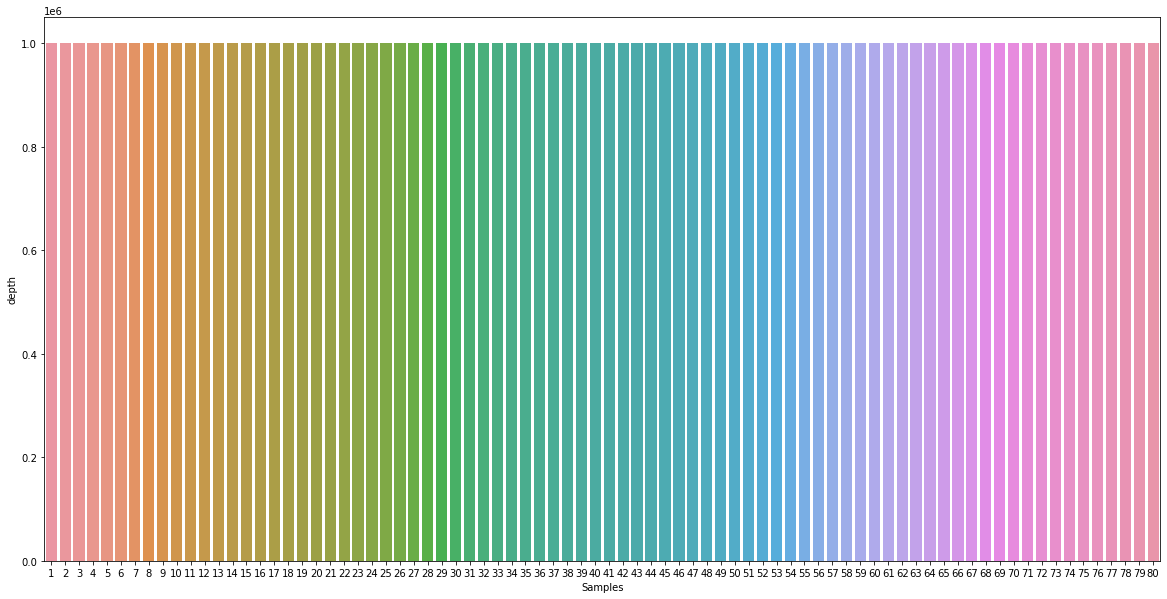

In [325]:
plt.figure(figsize=(20,10))
ax =sns.barplot( data=depth, y='depth', x="Samples")

Do not need to normalized

f)

In [326]:
dict_sample.values()

dict_values(['PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo'])

In [327]:
X = transcriptomics.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output = pca.fit_transform(X)
pca_output_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_df["groups"] =dict_sample.values()
pca_output_df

,PCA1,PCA2,PCA3,groups
0,59744.204875,5181.484207,34953.673194,PreAdipo
1,-36447.502550,11214.469551,6564.207381,PreAdipo
2,-15666.397486,-7873.272341,3183.165238,PreAdipo
3,-22423.413307,-20027.140990,-15412.563780,PreAdipo
4,-15830.729625,-13797.002922,-8727.933106,PreAdipo
...,...,...,...,...
75,39830.374618,16913.116447,2542.199214,Adipo
76,44353.454788,-2109.828106,-14291.751796,Adipo
77,-2515.045934,2289.387447,-29504.065115,Adipo
78,-23979.413582,32201.099006,-2077.782790,Adipo


In [328]:
fig = px.scatter_3d(pca_output_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

g)

In [329]:
transcriptomics_transf =pd.DataFrame(np.log2(1+transcriptomics.iloc[:,1:]))

In [330]:
transcriptomics_transf.insert(0, 'Gene_ID', transcriptomics.iloc[:,0])

In [331]:
transcriptomics_transf

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,4.247928,3.700440,3.321928,4.392317,3.321928,3.807355,4.392317,3.169925,2.321928,...,3.321928,3.321928,4.954196,3.321928,4.584963,4.087463,2.000000,3.906891,3.584963,4.087463
1,ENSG00000000005,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.906891,1.584963,4.523562,2.000000,0.000000,1.584963,0.000000,2.584963
2,ENSG00000000419,3.459432,3.321928,3.321928,3.169925,3.459432,3.459432,2.807355,5.169925,3.807355,...,2.000000,3.321928,3.321928,4.000000,3.169925,3.321928,3.321928,2.321928,4.087463,2.584963
3,ENSG00000000457,0.000000,3.584963,0.000000,2.807355,1.584963,3.700440,3.584963,1.000000,1.584963,...,3.321928,3.169925,3.169925,2.584963,2.807355,0.000000,3.700440,3.807355,2.321928,3.584963
4,ENSG00000000460,0.000000,0.000000,3.906891,2.321928,2.584963,0.000000,0.000000,2.807355,2.321928,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.321928,0.000000,3.459432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0.000000,0.000000,0.000000,1.000000,0.000000,2.584963,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.700440,0.000000,0.000000,0.000000,0.000000
63669,ENSG00000273486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.584963,0.000000,2.000000,0.000000,1.584963,2.584963,1.000000,0.000000,0.000000
63670,ENSG00000273487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63672,ENSG00000273489,0.000000,0.000000,0.000000,1.584963,0.000000,1.000000,3.169925,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


h)

In [332]:
X = transcriptomics_transf.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output_log = pca.fit_transform(X)
pca_output_log_df = pd.DataFrame(pca_output_log, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_log_df["groups"] =dict_sample.values()
pca_output_log_df

,PCA1,PCA2,PCA3,groups
0,-42.826325,58.870454,7.373568,PreAdipo
1,-46.518798,-5.596100,-14.508786,PreAdipo
2,-63.707133,-33.929024,37.018309,PreAdipo
3,-57.726232,-67.490809,-11.262911,PreAdipo
4,-49.397369,-52.324098,9.429046,PreAdipo
...,...,...,...,...
75,53.782769,-3.432689,-58.769944,Adipo
76,69.008352,1.024680,43.864694,Adipo
77,61.583718,-54.186683,4.247139,Adipo
78,30.881711,-23.491756,-43.344795,Adipo


In [333]:
fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

TRansformed data has better cluster

### 2. Differential gene expression

In [334]:
de_results = pd.DataFrame(columns = ["pval","fdr","log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

a)

next step Welch test guys (enfin chais pas jai pas verif la variance)

In [335]:
pvalue=[]
for index, gene in transcriptomics_transf.iterrows():
    #Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
    # PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}
    # ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples])
    _, pval =(ttest_ind(gene[1:41], gene[41:81], equal_var=False))
    pvalue.append(pval)
de_results["pval"] = pvalue
de_results

In [336]:
# preadip = transcriptomics_transf.columns[1:41]
# adipo = transcriptomics_transf.columns[41:82]
# _, pval = ttest_ind(transcriptomics_transf[preadip], transcriptomics_transf[adipo], equal_var=False)
# pval

b)

In [343]:
t_f, fdr_corrected_p_values = fdrcorrection(de_results.pval)
de_results.fdr = fdr_corrected_p_values
de_results

Why do we need to do that?

The false discovery rate (FDR) is a method of conceptualizing the rate of type I errors in null hypothesis testing when conducting multiple comparisons. FDR-controlling procedures are designed to control the FDR.


c)

In [349]:
de_results[de_results["fdr"] >= 0.05]

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
0,0.029213,0.124449,NaN,NaN,NaN
2,0.436098,0.605981,NaN,NaN,NaN
3,0.371879,0.541478,NaN,NaN,NaN
4,0.403271,0.574002,NaN,NaN,NaN
9,0.032582,0.135853,NaN,NaN,NaN
...,...,...,...,...,...
30232,1.000000,1.000000,NaN,NaN,NaN
30233,0.767912,0.863298,NaN,NaN,NaN
30234,0.104262,0.314575,NaN,NaN,NaN
30235,0.755924,0.854810,NaN,NaN,NaN


24623 genes are differentially expressed (DE) based on this calculation

d)

In [352]:
np.log2(transcriptomics.iloc[:,1:41].mean(axis=1)+1).reset_index(drop=True)
de_results["log2_mean_preadipo"] = np.log2(transcriptomics.iloc[:,1:41].mean(axis=1)+1).reset_index(drop=True)
de_results["log2_mean_adipo"] = np.log2(transcriptomics.iloc[:,41:81].mean(axis=1)+1).reset_index(drop=True)
de_results

0        3.666757
1        0.104337
2        3.399171
3        2.887525
4        1.432959
           ...   
30233    0.536053
30234    0.655352
30235    0.035624
30236    0.744161
30237    0.232661
Length: 30238, dtype: float64

e)

In [354]:
de_results["log2_fold_change"] = de_results["log2_mean_adipo"] - de_results["log2_mean_preadipo"]
de_results.index = transcriptomics["Unnamed: 0"]
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Unnamed: 0,,,,,
ENSG00000000003,2.921284e-02,1.244489e-01,3.666757,4.053111,0.386355
ENSG00000000005,7.456877e-09,1.877444e-07,0.104337,2.378512,2.274175
ENSG00000000419,4.360984e-01,6.059806e-01,3.399171,3.251719,-0.147452
ENSG00000000457,3.718791e-01,5.414783e-01,2.887525,3.031219,0.143693
ENSG00000000460,4.032710e-01,5.740024e-01,1.432959,1.201634,-0.231326
...,...,...,...,...,...
ENSG00000273485,7.679125e-01,8.632984e-01,0.536053,0.944858,0.408806
ENSG00000273486,1.042618e-01,3.145747e-01,0.655352,1.035624,0.380272
ENSG00000273487,7.559239e-01,8.548103e-01,0.035624,0.070389,0.034765


f)

In [355]:
de_results.sort_values('log2_fold_change', ascending=False, inplace=True)
de_results = de_results[de_results["fdr"] < 0.05]
de_results = de_results[de_results["log2_fold_change"] > 1]
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Unnamed: 0,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449
...,...,...,...,...,...
ENSG00000089685,2.943092e-11,1.105506e-09,5.984703,3.083213,-2.901490
ENSG00000117399,2.514095e-07,4.778202e-06,4.842979,1.877744,-2.965235
ENSG00000149968,3.987162e-15,2.638158e-13,4.836682,1.827819,-3.008863


3) a)

In [357]:
gene_annotation = pd.read_csv( os.path.join(core_path, 'Homo_sapiens.GRCh37.75.gene_annotation.txt'),sep= "\t")
gene_annotation.iloc[transcriptomics.index,:]
de_results["gene_symbol"] = gene_annotation.Name
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene_symbol
Unnamed: 0,,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889,NaN
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695,NaN
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271,NaN
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233,NaN
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449,NaN
...,...,...,...,...,...,...
ENSG00000099785,2.521863e-09,7.002395e-08,4.346957,5.350497,1.003540,NaN
ENSG00000187824,1.747159e-07,3.423888e-06,3.617651,4.620586,1.002935,NaN
ENSG00000100412,8.848764e-08,1.817724e-06,4.499846,5.500643,1.000797,NaN


In [362]:
pd.concat([transcriptomics, gene_annotation.Name], axis=1)

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo,Name
0,ENSG00000000003,18.0,12.0,9.0,20.0,9.0,13.0,20.0,8.0,4.0,...,9.0,30.0,9.0,23.0,16.0,3.0,14.0,11.0,16.0,RN7SL575P
1,ENSG00000000005,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,29.0,2.0,22.0,3.0,0.0,2.0,0.0,5.0,HLA-DPB2
2,ENSG00000000419,10.0,9.0,9.0,8.0,10.0,10.0,6.0,35.0,13.0,...,9.0,9.0,15.0,8.0,9.0,9.0,4.0,16.0,5.0,ARF4
3,ENSG00000000457,0.0,11.0,0.0,6.0,2.0,12.0,11.0,1.0,2.0,...,8.0,8.0,5.0,6.0,0.0,12.0,13.0,4.0,11.0,HIST1H4PS1
4,ENSG00000000460,0.0,0.0,14.0,4.0,5.0,0.0,0.0,6.0,4.0,...,0.0,3.0,0.0,1.0,0.0,1.0,4.0,0.0,10.0,RP11-768G7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BX322559.3
63671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RP11-184A2.2
63673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC113617.1
63674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HSD17B8


In [359]:
gene_annotation.Name

0           RN7SL575P
1            HLA-DPB2
2                ARF4
3          HIST1H4PS1
4        RP11-768G7.3
             ...     
63672            CDH2
63673      AC113617.1
63674         HSD17B8
63675          VPREB1
63676         SLC35A2
Name: Name, Length: 63677, dtype: object

In [364]:
pca_output_log_df

,PCA1,PCA2,PCA3,groups
0,-42.826325,58.870454,7.373568,PreAdipo
1,-46.518798,-5.596100,-14.508786,PreAdipo
2,-63.707133,-33.929024,37.018309,PreAdipo
3,-57.726232,-67.490809,-11.262911,PreAdipo
4,-49.397369,-52.324098,9.429046,PreAdipo
...,...,...,...,...
75,53.782769,-3.432689,-58.769944,Adipo
76,69.008352,1.024680,43.864694,Adipo
77,61.583718,-54.186683,4.247139,Adipo
78,30.881711,-23.491756,-43.344795,Adipo


In [366]:
transcriptomics.loc['ENSG00000170323']

KeyError: 'ENSG00000170323'

In [369]:
transcriptomics_id = transcriptomics
transcriptomics_id.index = transcriptomics["Unnamed: 0"]
transcriptomics_id

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
ENSG00000000457,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
ENSG00000000460,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,ENSG00000273485,0,0,0,1,0,5,0,0,0,...,0,0,0,0,0,12,0,0,0,0
ENSG00000273486,ENSG00000273486,0,0,0,0,1,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
ENSG00000273487,ENSG00000273487,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [373]:
np.array(transcriptomics_id.loc['ENSG00000170323'])

array(['ENSG00000170323', 97, 81, 120, 107, 107, 107, 85, 97, 136, 52,
       121, 98, 60, 103, 67, 89, 63, 114, 218, 152, 104, 107, 123, 160,
       88, 97, 90, 115, 85, 98, 114, 497, 88, 87, 80, 98, 174, 82, 152,
       46, 8920, 12203, 10760, 6432, 7107, 4696, 6093, 10604, 13193, 9896,
       4430, 4408, 6910, 12422, 20950, 11865, 1815, 12311, 7877, 2425,
       3293, 5594, 2464, 5211, 12502, 4678, 13465, 8075, 6139, 16416,
       5492, 6194, 13964, 9743, 8415, 5547, 14900, 7983, 1810, 2961],
      dtype=object)

In [377]:
pca_output_log_df["top_marker_gene_expression"] = np.array(transcriptomics_id.loc['ENSG00000170323'])[1:]
pca_output_log_df["top_marker_gene_expression"] = pca_output_log_df["top_marker_gene_expression"].astype(float)

In [378]:
pca_output_log_df

,PCA1,PCA2,PCA3,groups,top_marker_gene_expression
0,-42.826325,58.870454,7.373568,PreAdipo,97.0
1,-46.518798,-5.596100,-14.508786,PreAdipo,81.0
2,-63.707133,-33.929024,37.018309,PreAdipo,120.0
3,-57.726232,-67.490809,-11.262911,PreAdipo,107.0
4,-49.397369,-52.324098,9.429046,PreAdipo,107.0
...,...,...,...,...,...
75,53.782769,-3.432689,-58.769944,Adipo,5547.0
76,69.008352,1.024680,43.864694,Adipo,14900.0
77,61.583718,-54.186683,4.247139,Adipo,7983.0
78,30.881711,-23.491756,-43.344795,Adipo,1810.0


In [379]:
fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="top_marker_gene_expression")
fig.show()

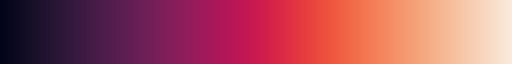

In [385]:
cmap= sns.color_palette("rocket", as_cmap=True)
cmap

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

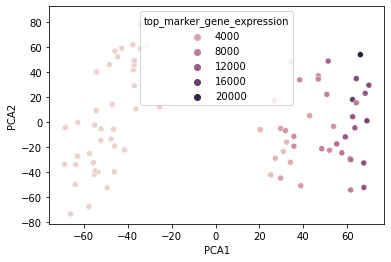

In [388]:
sns.scatterplot(data=pca_output_log_df, x='PCA1', y='PCA2', hue="top_marker_gene_expression", cmap=cmap)

# SOLVE : https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot